<a href="https://colab.research.google.com/github/hellothisjanu/Prodigy_ds_task2/blob/main/datasci2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


uploading the csv file

In [ ]:
df=pd.read_csv('/content/sample_data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Data cleaning and EDA on the dataset

In [ ]:
print("There are {} missing values in the data.".format(df.isna().sum().sum()))

There are 201 missing values in the data.


In [ ]:
df.bmi.replace(to_replace=np.nan,value=df.bmi.mean(), inplace=True)
print("There are {} missing values in the data.".format(df.isna().sum().sum()))

There are 0 missing values in the data.


In [ ]:
bmi_outliers=df[df['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

The dataset has 79 outliers in total. However, there is only one value that has the possibility of getting a stroke. Here, we will replace the bmi outliers with the mean.

In [ ]:
df["bmi"] = df["bmi"].apply(lambda x: df.bmi.mean() if x>50 else x)

Bar Chart (Gender Distribution)

In [ ]:
df['gender']=df['gender'].replace('Other','Male')

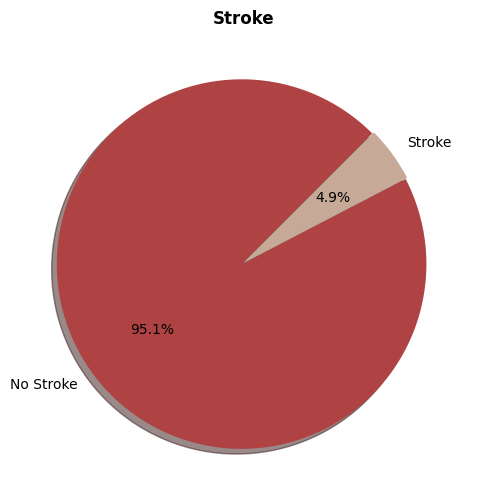

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
labels = ["No Stroke", "Stroke"]
values = df['stroke'].value_counts().tolist()

# Explode the second slice (Stroke) to make it stand out
explode = [0.01, 0]
colors = ['#AF4343', '#C6AA97']
ax.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45, explode=explode, colors=colors)
ax.set_title("Stroke", fontdict={'fontsize': 12}, fontweight='bold')
plt.show()